Importing  Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import time

##K-means  Clustering  from  scratch

Choosing K centroids at random from given data set

In [ ]:
x=[12.2,22.34,18.5,29.33,24.8,45.2,44.1,51.5,53.5,52.3,55,6,52.3,54,2,55.5,61.4,63.4,71.2,63.5]
y=[39.5,36.3,30.2,52.6,54.4,46.6,55.4,59.2,63.9,70.5,68.2,54.1,23.8,14.2,12.1,8.8,17.2,22.4,4.5,4.5]
k=3
centroids={}
for i in range(k):
  centroids[i]=[np.random.choice(x),np.random.choice(y)]


In [ ]:
centroids

{0: [6.0, 39.5], 1: [55.0, 4.5], 2: [22.34, 30.2]}

Plotting the data set with randomly selected centroids

Text(0, 0.5, 'Y values')

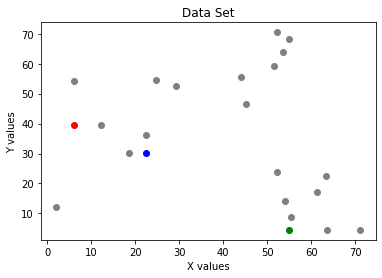

In [ ]:
plt.scatter(x,y,color='grey')
pallete=['r','g','b']
for i in centroids.keys():
  plt.scatter(centroids[i][0],centroids[i][1],color=pallete[i])
plt.title("Data Set")
plt.xlabel("X values")
plt.ylabel("Y values")


###Calculating distance of each point from the centroids

Euclidean distance=$\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$



In [ ]:
def distance(x,y,centroids):
  dist=0
  distlist=[]
  for j in range(len(x)):
    for i in centroids.keys():
      dist=np.sqrt((x[j]-centroids[i][0])**2+(y[j]-centroids[i][1])**2)
      distlist.append(dist)
  distances = dict()
  chunk_size = 3
  j=0
  for i in range(0,len(x)):
    distances[i]=(distlist[j:j+chunk_size])
    j+=3
  return distances

In [ ]:
distances=distance(x,y,centroids)
print(distances)

{0: [6.199999999999999, 55.28869685568651, 13.758982520520913], 1: [16.650393388746103, 45.58415952938037, 6.099999999999998], 2: [15.580115532305914, 44.64011648730321, 3.84], 3: [26.756287111630417, 54.52117845388157, 23.46529565123781], 4: [23.988538930080757, 58.32709490451243, 24.32471171463292], 5: [39.83779612378175, 43.2255711356137, 28.13431356902102], 6: [41.28462183428595, 52.054010412263146, 33.29470828825506], 7: [49.581649831364025, 54.81186003047151, 41.12548601536522], 8: [53.40046816274179, 59.418936375536035, 45.8981001785477], 9: [55.71974515376035, 66.0552041855901, 50.21644750477675], 10: [56.78635399459979, 63.7, 50.10664227425342], 11: [14.600000000000001, 69.72201947735019, 28.951780601545046], 12: [48.889467168297095, 19.487944991712183, 30.635952735307576], 13: [54.25946921966709, 9.751410154434074, 35.47330827537798], 14: [27.690431560378396, 53.54213294219796, 27.22729512823483], 15: [58.24723169387537, 4.328972164382673, 39.46575224165884], 16: [59.71976222

Finding the closest centroid to each point

In [ ]:
mindist=[]
for i in distances:
  minimum=np.argmin(distances[i])
  mindist.append(minimum)
mindist=np.array(mindist,int)

In [ ]:
print(mindist)

[0 2 2 2 0 2 2 2 2 2 2 0 1 1 2 1 1 1 1 1]


Plotting the clustered data

['r', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'g', 'g', 'b', 'g', 'g', 'g', 'g', 'g']


Text(0, 0.5, 'Y values')

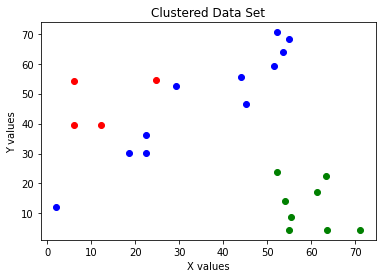

In [ ]:
colors=[None]*len(mindist)
for i in range(len(mindist)):
  if mindist[i]==0:
    colors[i]='r'
  elif mindist[i]==1:
    colors[i]='g'
  else:
    colors[i]='b'
print(colors)
for i in centroids.keys():
  plt.scatter(centroids[i][0],centroids[i][1],color=pallete[i])
for i in range(len(x)):
  plt.scatter(x[i],y[i],color=colors[i])
plt.title("Clustered Data Set")
plt.xlabel("X values")
plt.ylabel("Y values")

Text(0, 0.5, 'Y values')

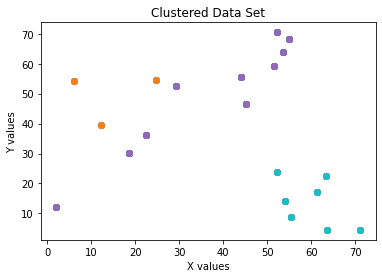

In [ ]:
mindist=np.array(mindist)
xval=np.array(x)
yval=np.array(y)
data=np.stack((xval,yval),axis=1)
for i in mindist:
    plt.scatter(xval[mindist==i],yval[mindist==i],label = i)
plt.title("Clustered Data Set")
plt.xlabel("X values")
plt.ylabel("Y values")

###Updating Centroids


[0 0 0 2 0 2 2 2 2 2 2 0 1 1 0 1 1 1 1 1]


Text(0, 0.5, 'Y values (Annual income)')

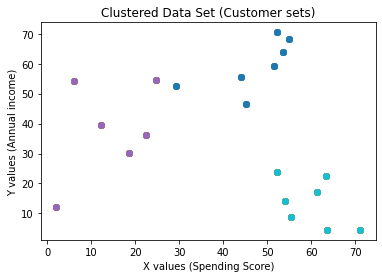

In [ ]:
centroid = []
distances=[]
for i in range(k):
  temp_cent = data[mindist==i].mean(axis=0)
  centroid.append(temp_cent)
centroid = np.vstack(centroid)
distances = cdist(data, centroid ,'euclidean')
mindist = np.array([np.argmin(i) for i in distances])
print(mindist)
for i in mindist:
    plt.scatter(data[mindist==i,0],data[mindist==i,1],label = i)
plt.title("Clustered Data Set (Customer sets)")
plt.xlabel("X values (Spending Score)")
plt.ylabel("Y values (Annual income)")

##Defining a function for K means Clustering

Uploading data file

In [ ]:
from google.colab import files
uploaded=files.upload() #uploading files

Saving Mall_Customers (1).csv to Mall_Customers (1).csv


Preprocessing the data

In [ ]:
customer_data = pd.read_csv('Mall_Customers (1).csv')
customer_data.shape
X = customer_data.iloc[:,[3,4]].values
#print(X)
xval=list()
yval=list()
xval=X[:,0]
yval=X[:,1]
#print(xval)
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Plotting unclustered Data

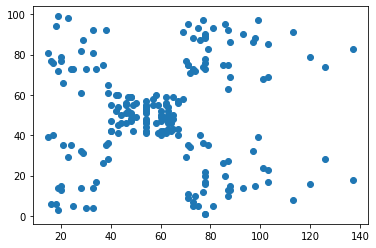

In [ ]:
plt.scatter(xval,yval)

In [ ]:
def kmeans(x,k, no_of_iterations):
    c = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids
    centroids = x[c, :]
    distances = cdist(x, centroids ,'euclidean')
    mindist = np.array([np.argmin(i) for i in distances])
    for _ in range(no_of_iterations):
        centroids = []
        for i in range(k):
            temp_cent = x[mindist==i].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids

        distances = cdist(x, centroids ,'euclidean')
        mindist = np.array([np.argmin(i) for i in distances])

    return mindist


$\textbf{Visualising the clusters}$

Plotting the clustered Data

[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 1 0 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


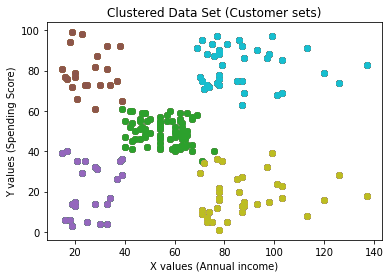

In [ ]:
start = time.time()
mindist=kmeans(X,5,10)
end = time.time()
print(mindist)
for i in mindist:
    plt.scatter(X[mindist==i,0],X[mindist==i,1],label = i)
plt.title("Clustered Data Set (Customer sets)")
plt.xlabel("X values (Annual income)")
plt.ylabel("Y values (Spending Score)")

t0=end-start


##K means Clustering Using Sklearn

###Finding the best value of K for given data set using WCSS (Within Cluster Sum of Squares)

WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

$WCSS=\sum_{i=1}^k\sum_{x_i \in cluster j}(x_i-c_j)^2$
---



In [ ]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)


Plotting the Elbow graph

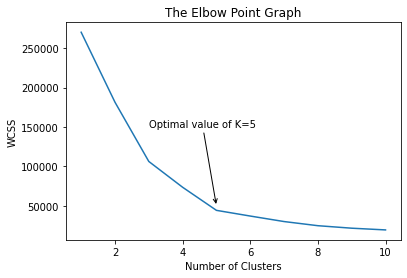

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.annotate("Optimal value of K=5", xy=(5, 50000), xytext=(3,150000),
            arrowprops=dict(arrowstyle="->"))
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [ ]:
start = time.time()
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
end = time.time()
t1=end-start
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Visualising the Clusters

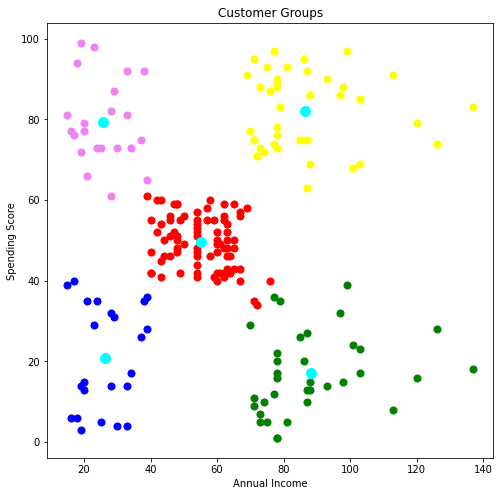

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#Clustering Analysis

##$\underline{V}$ $\underline{Measure}$

The V-measure is the harmonic mean between homogeneity and completeness.Score is between 0.0 and 1.0. 1.0 stands for perfectly complete labeling

Let us assume that there are N data samples, C different class labels, K clusters and $a_{ck}$ number of data-points belonging to the class c and cluster k. Then the homogeneity h and completeness c is given by the following:

$\textbf{Homogenity}$ A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

h=1-$\frac{H(C|K)}{H(C)}$

where

H(C|K)=-$\sum_{k=1}^K\sum_{c=1}^C\frac{a_{ck}}{N}log(\frac{a_{ck}}{\sum_{c=1}^Ca_{ck}})$

H(C)=-$\sum_{c=1}^C\frac{\sum_{k=1}^Ka_{ck}}{C}log(\frac{\sum_{k=1}^Ka_{ck}}{C})$

$\textbf{completeness}$ A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

C=1-$\frac{H(K|C)}{H(K)}$

where

H(C|K)=-$\sum_{c=1}^C\sum_{k=1}^K\frac{a_{ck}}{N}log(\frac{a_{ck}}{\sum_{k=1}^Ka_{ck}})$

H(C)=-$\sum_{k=1}^K\frac{\sum_{c=1}^Ca_{ck}}{C}log(\frac{\sum_{c=1}^Ca_{ck}}{C})$

Both scores have positive values between 0.0 and 1.0, larger values being desirable.

V measure is computed as-

$V = \Large{\frac{(1 + \beta)hc}
     {(\beta h + c)}}$


In [ ]:
from sklearn.metrics.cluster import v_measure_score

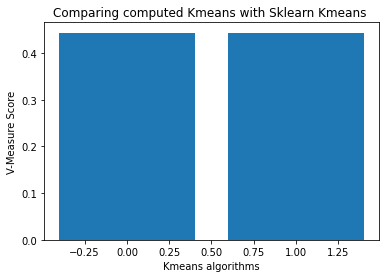

V-measure score of our algorithm= 0.4437332824468721
V-measure score of sklearn Kmeans= 0.4426215864007475


In [ ]:
vscore=[]
kmeansalgo=[0,1]
v0=v_measure_score(yval,mindist)
v1=v_measure_score(yval,Y)
vscore.append(v0)
vscore.append(v1)
plt.bar(kmeansalgo, vscore)
plt.xlabel('Kmeans algorithms')
plt.ylabel('V-Measure Score')
plt.title('Comparing computed Kmeans with Sklearn Kmeans ')
plt.show()
print("V-measure score of our algorithm=",v0)
print("V-measure score of sklearn Kmeans=",v1)

#Silhouette Coefficient

The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

s=$\large{\frac{b-a}{max(a,b)}}$

In [ ]:
from sklearn import metrics

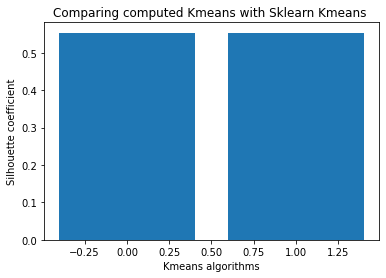

silhouette coefficient of our algorithm= 0.5532176107575425
silhouette coefficient of sklearn Kmeans= 0.553931997444648


In [ ]:
s0=metrics.silhouette_score(X, mindist, metric='euclidean')
s1=metrics.silhouette_score(X, Y, metric='euclidean')
sscore=[]
sscore.append(s0)
sscore.append(s1)
plt.bar(kmeansalgo, sscore)
plt.xlabel('Kmeans algorithms')
plt.ylabel('Silhouette coefficient')
plt.title('Comparing computed Kmeans with Sklearn Kmeans ')
plt.show()
print("silhouette coefficient of our algorithm=",s0)
print("silhouette coefficient of sklearn Kmeans=",s1)

#Random Index
If C is a ground truth class assignment and K the clustering, let us define a and b  as:

a: the number of pairs of elements that are in the same set in C and in the same set in K

b: the number of pairs of elements that are in different sets in C and in different sets in K

The unadjusted Rand index is then given by:

 $RI=\frac{a+b}{C_2^{n_{samples}}}$

where $C_2^{n_{samples}}$ is the total number of possible pairs in the dataset. It does not matter if the calculation is performed on ordered pairs or unordered pairs as long as the calculation is performed consistently.

However, the Rand index does not guarantee that random label assignments will get a value close to zero (esp. if the number of clusters is in the same order of magnitude as the number of samples).

To counter this effect we can discount the expected RI- E[RI] of random labelings by defining the adjusted Rand index as follows:

$ARI=\frac{RI-E[RI]}{max(RI)-E[RI]}$





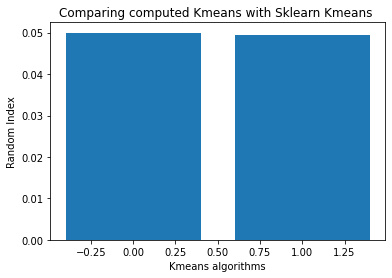

Random Index of our algorithm= 0.049984388720755286
Random Index of sklearn Kmeans= 0.04935315215160662


In [ ]:
rscore=[]
kmeansalgo=[0,1]
r0=metrics.adjusted_rand_score(yval,mindist)
r1=metrics.adjusted_rand_score(yval,Y)
rscore.append(r0)
rscore.append(r1)
plt.bar(kmeansalgo, rscore)
plt.xlabel('Kmeans algorithms')
plt.ylabel('Random Index')
plt.title('Comparing computed Kmeans with Sklearn Kmeans ')
plt.show()
print("Random Index of our algorithm=",r0)
print("Random Index of sklearn Kmeans=",r1)

##F-Measure

###Precision-
The precision is the ratio $\frac{tp}{(tp + fp)}$ where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

###Recall-
The recall is the ratio $\frac{tp}{(tp + fn)}$ where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F score can be interpreted as a harmonic mean of the precision and recall, where an F score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F score are equal. The formula for the F score is:

F = 2 *$ \frac{(precision * recall)} {(precision + recall)}$


##Confusion Matrix

In multilabel confusion matrix , the count of true negatives is $M_{00}$, false negatives is $M_{10}$ , true positives is $M_{11}$  and false positives is $M_{01}$


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

For our algorithm

In [ ]:
multilabel_confusion_matrix(yval, mindist,labels=[0,1,2,3,4])

array([[[177.,  23.],
        [  0.,   0.]],

       [[118.,  80.],
        [  2.,   0.]],

       [[161.,  39.],
        [  0.,   0.]],

       [[177.,  22.],
        [  1.,   0.]],

       [[162.,  36.],
        [  2.,   0.]]])

For Sklearn

In [ ]:
multilabel_confusion_matrix(yval, Y,labels=[0,1,2,3,4])

array([[[165,  35],
        [  0,   0]],

       [[117,  81],
        [  2,   0]],

       [[161,  39],
        [  0,   0]],

       [[177,  22],
        [  1,   0]],

       [[177,  21],
        [  0,   2]]])

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

(0.0, 0.0, 0.0, None)
(0.0008695652173913043, 0.01, 0.0016, None)


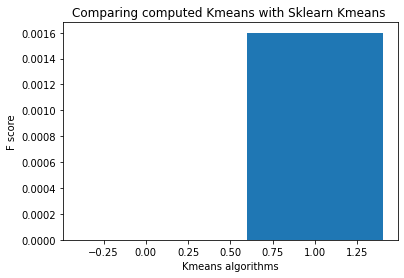

F score of our algorithm= 0.0015
F score of sklearn Kmeans= 0.0016


In [ ]:
fscore=[]
kmeansalgo=[0,1]
f0=precision_recall_fscore_support(yval,mindist,average="weighted")
f1=precision_recall_fscore_support(yval,Y,average="weighted")
print(f0)
print(f1)
fscore.append(f0[2])
fscore.append(f1[2])
plt.bar(kmeansalgo, fscore)
plt.xlabel('Kmeans algorithms')
plt.ylabel('F score')
plt.title('Comparing computed Kmeans with Sklearn Kmeans ')
plt.show()
print("F score of our algorithm= 0.0015")
print("F score of sklearn Kmeans=",f1[2])

In [ ]:
from sklearn.metrics import f1_score

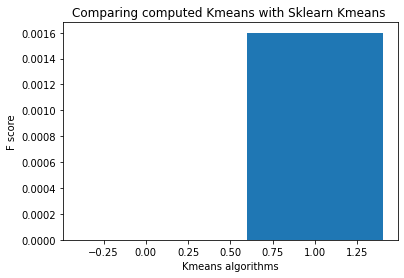

F score of our algorithm= 0.0
F score of sklearn Kmeans= 0.0016


In [ ]:
fscore=[]
kmeansalgo=[0,1]
f0=f1_score(yval,mindist,average='weighted')
f1=f1_score(yval,Y,average="weighted")
fscore.append(f0)
fscore.append(f1)
plt.bar(kmeansalgo,fscore)
plt.xlabel('Kmeans algorithms')
plt.ylabel('F score')
plt.title('Comparing computed Kmeans with Sklearn Kmeans ')
plt.show()
print("F score of our algorithm=",f0)
print("F score of sklearn Kmeans=",f1)

###Time Complexity

In [ ]:
print("Elapsed Time of our function= ",t0,"s")
print("Elapsed Time of Sklearn function= ",t1,"s")
print("Time Difference=",abs(t0-t1),"s")

Elapsed Time of our function=  0.024718284606933594 s
Elapsed Time of Sklearn function=  0.22387385368347168 s
Time Difference= 0.19915556907653809 s


##Drawbacks of K-means

* We can’t assure that this algorithm will lead to the best global solution. Selecting different random centroids at the beginning affects the final results.

* Value of K need to be specified beforehand: We can expect this value only if we have a good idea about our dataset and if we are working with a new dataset then elbow method can be used to determine value of K.

* Slow for large number of samples: As this algorithm access each point of the dataset, it becomes slow when the sample size grows.





$\textbf{Clustering of Text Documents Using K-Means}$

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.cluster import silhouette_score

##K-Means clustering of 20 News Group

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian',
            'comp.graphics', 'sci.med','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x','misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','talk.politics.guns','sci.space','talk.politics.mideast','talk.politics.misc','talk.religion.misc']
dataset = fetch_20newsgroups(subset='all', categories=categories,
                           shuffle=True, random_state=42)
vectorizer = TfidfVectorizer(max_df=0.5,
                           min_df=2,
                           stop_words='english')
Z = vectorizer.fit_transform(dataset.data)
labels1 = dataset.target
true_k = np.unique(labels1)

In [ ]:
dataset.data

In [ ]:
n=20
km = KMeans(n_clusters=n, init='k-means++', max_iter=100, n_init=1)
km.fit(Z)
print(len(km.labels_))

18846


##Clustered Data

In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n):
  print("cluster %d:" % i)
  for ind in order_centroids[i,:5]:
      print('%s' % terms[ind])
  print()

cluster 0:
israel
israeli
jews
arab
jake

cluster 1:
game
hockey
team
ca
games

cluster 2:
stratus
fbi
batf
com
koresh

cluster 3:
cleveland
cwru
freenet
reserve
ins

cluster 4:
sandvik
kent
newton
apple
com

cluster 5:
god
jesus
bible
christian
christ

cluster 6:
windows
dos
file
ms
os

cluster 7:
baseball
game
team
year
games

cluster 8:
ohio
magnus
state
acs
university

cluster 9:
uk
ac
mathew
university
demon

cluster 10:
key
clipper
encryption
chip
keys

cluster 11:
nasa
space
gov
henry
access

cluster 12:
com
university
posting
host
nntp

cluster 13:
card
video
monitor
mouse
bit

cluster 14:
people
gun
com
don
think

cluster 15:
cramer
armenian
turkish
optilink
armenians

cluster 16:
sale
00
offer
shipping
condition

cluster 17:
bike
com
dod
sun
ride

cluster 18:
colorado
boulder
ax
spot
bmug

cluster 19:
drive
scsi
ide
controller
drives



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##Cluster Analysis

V-measure and silhouette coefficient

In [ ]:
print("V-measure: %0.3f" %v_measure_score(labels1, km.labels_))
print("Silhouette Coefficient: %0.3f"
    %silhouette_score(Z, km.labels_))

V-measure: 0.335
Silhouette Coefficient: 0.006


Random index

In [ ]:
print("Random Index: %0.3f"
    %metrics.adjusted_rand_score(labels1, km.labels_))

Random Index: 0.085


#F-Measure

###Precision-
The precision is the ratio $\frac{tp}{(tp + fp)}$ where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.

###Recall-
The recall is the ratio $\frac{tp}{(tp + fn)}$ where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F score can be interpreted as a harmonic mean of the precision and recall, where an F score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F score are equal. The formula for the F score is:

F = 2 *$ \frac{(precision * recall)} {(precision + recall)}$


##Confusion Matrix

In multilabel confusion matrix , the count of true negatives is $M_{00}$, false negatives is $M_{10}$ , true positives is $M_{11}$  and false positives is $M_{01}$.



In [ ]:
labels=[]
for i in range(n):
  labels.append(i)

In [ ]:
multilabel_confusion_matrix(labels1,km.labels_,labels=labels)

In [ ]:
f=precision_recall_fscore_support(labels1, km.labels_,average="weighted")
print("Precision: %0.3f"%f[0])
print("Recall: %0.3f"%f[1])
print("F score: %0.3f"
    %metrics.f1_score(labels1, km.labels_,average='weighted'))


Precision: 0.069
Recall: 0.039
F score: 0.031


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = SnowballStemmer('english', ignore_stopwords=True)
stemmerp=PorterStemmer()
stemmerl=LancasterStemmer()
class StemmedTfidfVectorizer(TfidfVectorizer):

    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedTfidfVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer

    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))

In [ ]:
stemmedvectorizer = StemmedTfidfVectorizer(stemmer=stemmer, stop_words='english', sublinear_tf=True)
labels1 = dataset.target
stemmedvectorizer.fit(dataset.data, labels1)
true_k = np.unique(labels1)

In [ ]:
n=20
km = KMeans(n_clusters=n, init='k-means++', max_iter=100, n_init=1)
km.fit(Z)
print(len(km.labels_))

18846


In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = stemmedvectorizer.get_feature_names()
for i in range(n):
  print("cluster %d:" % i)
  for ind in order_centroids[i,:n]:
      print('%s' % terms[ind])
  print()

In [ ]:
f=precision_recall_fscore_support(labels1, km.labels_,average="weighted")
print("Precision after Snowball stemmer: %0.3f"%f[0])
print("Recall after Snowball Stemmer: %0.3f"%f[1])
print("F score after Snowball Stemmer: %0.3f"
    %metrics.f1_score(labels1, km.labels_,average='weighted'))

Precision after Snowball stemmer: 0.071
Recall after Snowball Stemmer: 0.083
F score after Snowball Stemmer: 0.057


In [ ]:
stemmedvectorizerp = StemmedTfidfVectorizer(stemmer=stemmerp, stop_words='english', sublinear_tf=True)
labels1p = dataset.target
stemmedvectorizerp.fit(dataset.data, labels1p)
true_kp = np.unique(labels1p)



In [ ]:
n=20
km = KMeans(n_clusters=n, init='k-means++', max_iter=100, n_init=1)
km.fit(Z)
print(len(km.labels_))

18846


In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = stemmedvectorizerp.get_feature_names()
for i in range(n):
  print("cluster %d:" % i)
  for ind in order_centroids[i,:n]:
      print('%s' % terms[ind])
  print()

In [ ]:
f=precision_recall_fscore_support(labels1p, km.labels_,average="weighted")
print("Precision after Porter stemmer: %0.3f"%f[0])
print("Recall after Porter Stemmer: %0.3f"%f[1])
print("F score after Porter Stemmer: %0.3f"
    %metrics.f1_score(labels1p, km.labels_,average='weighted'))

Precision after Porter stemmer: 0.032
Recall after Porter Stemmer: 0.028
F score after Porter Stemmer: 0.019


In [ ]:
stemmedvectorizerl = StemmedTfidfVectorizer(stemmer=stemmerl, stop_words='english', sublinear_tf=True)
labels1l = dataset.target
stemmedvectorizerl.fit(dataset.data, labels1l)
true_kl = np.unique(labels1l)

In [ ]:
n=20
km = KMeans(n_clusters=n, init='k-means++', max_iter=100, n_init=1)
km.fit(Z)
print(len(km.labels_))

18846


In [ ]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = stemmedvectorizerl.get_feature_names()
for i in range(n):
  print("cluster %d:" % i)
  for ind in order_centroids[i,:n]:
      print('%s' % terms[ind])
  print()

In [ ]:
f=precision_recall_fscore_support(labels1l, km.labels_,average="weighted")
print("Precision after Lancaster stemmer: %0.3f"%f[0])
print("Recall after Lancaster Stemmer: %0.3f"%f[1])
print("F score after Lancaster Stemmer: %0.3f"
    %metrics.f1_score(labels1l, km.labels_,average='weighted'))


Precision after Lancaster stemmer: 0.078
Recall after Lancaster Stemmer: 0.071
F score after Lancaster Stemmer: 0.067


#Sentence Embedding Techniques

In [ ]:
sentences = ["I ate dinner.",
       "We had a three-course meal.",
       "Brad came to dinner with us.",
       "He loves fish tacos.",
       "In the end, we all felt like we ate too much.",
       "We all agreed; it was a magnificent evening."]

Tokenization

In [ ]:
tokenized_sent = []
for s in sentences:
    tokenized_sent.append(word_tokenize(s.lower()))
tokenized_sent

[['i', 'ate', 'dinner', '.'],
 ['we', 'had', 'a', 'three-course', 'meal', '.'],
 ['brad', 'came', 'to', 'dinner', 'with', 'us', '.'],
 ['he', 'loves', 'fish', 'tacos', '.'],
 ['in',
  'the',
  'end',
  ',',
  'we',
  'all',
  'felt',
  'like',
  'we',
  'ate',
  'too',
  'much',
  '.'],
 ['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening', '.']]

Cosine similarity

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

##Doc2Vec

Creating a tagged sentence corpus

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

[TaggedDocument(words=['i', 'ate', 'dinner', '.'], tags=[0]),
 TaggedDocument(words=['we', 'had', 'a', 'three-course', 'meal', '.'], tags=[1]),
 TaggedDocument(words=['brad', 'came', 'to', 'dinner', 'with', 'us', '.'], tags=[2]),
 TaggedDocument(words=['he', 'loves', 'fish', 'tacos', '.'], tags=[3]),
 TaggedDocument(words=['in', 'the', 'end', ',', 'we', 'all', 'felt', 'like', 'we', 'ate', 'too', 'much', '.'], tags=[4]),
 TaggedDocument(words=['we', 'all', 'agreed', ';', 'it', 'was', 'a', 'magnificent', 'evening', '.'], tags=[5])]

Training the model with the parameters

In [ ]:
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.vocab

In [ ]:
test_doc = word_tokenize("I had pizza and pasta".lower())
test_doc_vector = model.infer_vector(test_doc)
positive=model.docvecs.most_similar(positive = [test_doc_vector])
print(positive)
'''
positive = List of sentences that contribute positively.
'''

[(4, 0.6465835571289062), (3, 0.32900309562683105), (5, 0.2867750823497772), (1, 0.1896631270647049), (2, 0.0638396143913269), (0, -0.11978825181722641)]


'\npositive = List of sentences that contribute positively.\n'

##SentenceBERT


In [ ]:
!pip install sentence-transformers

loading the pre-trained BERT model

In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

encoding the provided sentence

In [ ]:
sentence_embeddings = sbert_model.encode(sentences)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

defining a test query and encoding it

In [ ]:
query = "I had pizza and pasta"
query_vec = sbert_model.encode([query])[0]

computing the cosine similarity using scipy and retrieving the similarity values between the sentences and our test query:

In [ ]:
for sent in sentences:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner. ; similarity =  0.7173462
Sentence =  We had a three-course meal. ; similarity =  0.6371338
Sentence =  Brad came to dinner with us. ; similarity =  0.5897909
Sentence =  He loves fish tacos. ; similarity =  0.6223936
Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.4198049
Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.18081607


#Universal Sentence Encoder


In [ ]:
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

loading the model

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

NameError: ignored

generating embeddings for our sentence list as well as for our query

In [ ]:
sentence_embeddings = model(sentences)
query = "I had pizza and pasta"
query_vec = model([query])[0]

Finally, we will compute the similarity between our test query and the list of sentences



In [ ]:
for sent in sentences:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  I ate dinner. ; similarity =  0.46866417
Sentence =  We had a three-course meal. ; similarity =  0.35643065
Sentence =  Brad came to dinner with us. ; similarity =  0.20338944
Sentence =  He loves fish tacos. ; similarity =  0.16515437
Sentence =  In the end, we all felt like we ate too much. ; similarity =  0.14987424
Sentence =  We all agreed; it was a magnificent evening. ; similarity =  0.058435917


Sentence Embedding on 20 news group

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
categories = ['alt.atheism']
dataset = fetch_20newsgroups(subset='all', categories=categories,
                           shuffle=True, random_state=42)


# Doc2Vec

Tokenization

In [ ]:
X=dataset.data
tokenizer = tfds.deprecated.text.Tokenizer()
tokenized_sent = [tokenizer.tokenize(text) for text in X]

In [ ]:
tokenized_sent

In [ ]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

In [ ]:
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.vocab

In [ ]:
test_doc = word_tokenize("What is Atheism?".lower())
test_doc_vector = model.infer_vector(test_doc)
positive=model.docvecs.most_similar(positive = [test_doc_vector])
print(positive)
'''
positive = List of sentences that contribute positively.
'''

[(576, 0.8155016303062439), (172, 0.8080027103424072), (530, 0.8020455837249756), (377, 0.7858550548553467), (283, 0.7723811268806458), (666, 0.7698906660079956), (334, 0.7640208005905151), (604, 0.7631247639656067), (292, 0.7577344179153442), (760, 0.7493413686752319)]


'\npositive = List of sentences that contribute positively.\n'

#Sentence Bert

In [ ]:
sentence_embeddings = sbert_model.encode(dataset.data)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

In [ ]:
query = "What is atheism?"
query_vec = sbert_model.encode([query])[0]

In [ ]:
for sent in dataset.data:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

#Universal Sentence encoder

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
sentence_embeddings = model(dataset.data)
query = "What is atheism?"
query_vec = model([query])[0]

In [ ]:
for sent in dataset.data:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

In [ ]:
import re
import string
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

#An analysis of Machine Learning models on Covid19 vaccine opinion on Twitter



#Dataset-1

##COVID-19 vaccine stance classification from tweets

In [ ]:
testdf = pd.read_csv('/vax_test.csv')
testdf.head()


,id,tweet
0,1472958183882719233t,So true. Take control of what you can…get vac...
1,1449995880904470529t,The vaccinated still spread it and are factori...
2,1480413964265660416t,"NT records 403 new cases of COVID-19, as it ex..."
3,1408119497962057742t,@ochealth You are experimenting with people. B...
4,1439361704320806915t,@LPCPressBox So I guess we’re supposed to just...


In [ ]:
traindf=pd.read_csv('/vax_train.csv')
traindf.head()

,id,tweet,label
0,1329771561671417856,Today Pfizer said it's asking U.S. regulators ...,Neutral
1,1266030447919804420,Good news on development of new #covid19 #vacc...,ProVax
2,1238769307456172034,Once they get a corona vaccine I don’t want to...,ProVax
3,1328814394822705152,Free flu vaccines and COVID-19 tests! https://...,Neutral
4,1254610119876280320,"Bollywood Gupshup,Russian Researchers Will Tes...",ProVax


In [ ]:
pip install text_hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 7.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import text_hammer as th

In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
def text_preprocessing(df,col_name):
  column = col_name
  df[column] = df[column].progress_apply(lambda x:str(x).lower())
  df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
  df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
  df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
  df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
  df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
  df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
  return(df)

In [ ]:
Xtest = dfvax.iloc[:,[0,1]].values
Xtrain= dfvaxtrain.iloc[:,[0,2]].values
#print(X)
idtest=list()
idtrain=list()
label=list()
idtest=Xtest[:,0]
idtrain=Xtrain[:,0]
label=Xtrain[:,1]
#print(id)

NameError: ignored

# Preprocessing the data

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
dfvax['clean_tweet'] = np.vectorize(remove_pattern)(dfvax['tweet'], "@[\w]*")# remove twitter handles (@user)
dfvaxtrain['clean_tweet'] = np.vectorize(remove_pattern)(dfvaxtrain['tweet'], "@[\w]*")# remove twitter handles (@user)

NameError: ignored

In [ ]:
dfvax.head()
dfvaxtrain.head()

,id,tweet,label,clean_tweet
0,1329771561671417856,Today Pfizer said it's asking U.S. regulators ...,Neutral,Today Pfizer said it's asking U.S. regulators ...
1,1266030447919804420,Good news on development of new #covid19 #vacc...,ProVax,Good news on development of new #covid19 #vacc...
2,1238769307456172034,Once they get a corona vaccine I don’t want to...,ProVax,Once they get a corona vaccine I don’t want to...
3,1328814394822705152,Free flu vaccines and COVID-19 tests! https://...,Neutral,Free flu vaccines and COVID-19 tests! https://...
4,1254610119876280320,"Bollywood Gupshup,Russian Researchers Will Tes...",ProVax,"Bollywood Gupshup,Russian Researchers Will Tes..."


In [ ]:
dfvax['clean_tweet'] = dfvax['clean_tweet'].str.replace("[^a-zA-Z#]", " ") # remove special characters, numbers and punctuations
dfvaxtrain['clean_tweet'] = dfvaxtrain['clean_tweet'].str.replace("[^a-zA-Z#]", " ") # remove special characters, numbers and punctuations

dfvax.head()

,id,tweet,clean_tweet
0,1472958183882719233t,So true. Take control of what you can…get vac...,So true Take control of what you can get vac...
1,1449995880904470529t,The vaccinated still spread it and are factori...,The vaccinated still spread it and are factori...
2,1480413964265660416t,"NT records 403 new cases of COVID-19, as it ex...",NT records new cases of COVID as it ex...
3,1408119497962057742t,@ochealth You are experimenting with people. B...,You are experimenting with people By Califor...
4,1439361704320806915t,@LPCPressBox So I guess we’re supposed to just...,So I guess we re supposed to just forget abou...


In [ ]:
dfvax['clean_tweet'] = dfvax['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3])) # remove short words
dfvaxtrain['clean_tweet'] = dfvaxtrain['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3])) # remove short words
dfvax.head()

,id,tweet,clean_tweet
0,1472958183882719233t,So true. Take control of what you can…get vac...,true Take control what vaccinated mask sociall...
1,1449995880904470529t,The vaccinated still spread it and are factori...,vaccinated still spread factories vaccine resi...
2,1480413964265660416t,"NT records 403 new cases of COVID-19, as it ex...",records cases COVID exits lockout introduces v...
3,1408119497962057742t,@ochealth You are experimenting with people. B...,experimenting with people California state sho...
4,1439361704320806915t,@LPCPressBox So I guess we’re supposed to just...,guess supposed just forget about Trudeau aband...


In [ ]:
Z=dfvax.iloc[:,[0,2]].values
tweets=Z[:,1]
print(tweets)

In [ ]:
train_cleaned_df = text_preprocessing(traindf,'tweet')

  0%|          | 0/4392 [00:00<?, ?it/s]

  0%|          | 0/4392 [00:00<?, ?it/s]

  0%|          | 0/4392 [00:00<?, ?it/s]

  0%|          | 0/4392 [00:00<?, ?it/s]

  0%|          | 0/4392 [00:00<?, ?it/s]

  0%|          | 0/4392 [00:00<?, ?it/s]

  0%|          | 0/4392 [00:00<?, ?it/s]

In [ ]:
traindf = train_cleaned_df.copy()

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 8.9 MB/s 
     |████████████████████████████████| 163 kB 56.6 MB/s 
     |████████████████████████████████| 6.6 MB 57.2 MB/s 


In [ ]:
import transformers
from transformers import AutoTokenizer,TFBertModel

In [ ]:
tf=AutoTokenizer.from_pretrained('bert-large-uncased')
bert=TFBertModel.from_pretrained('bert-large-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
xtrain=tf(
    text=traindf['tweet'].tolist(),
    add_special_tokens=True,
    max_length=105,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True)

In [ ]:
import random as rd
import math

# Tokenization

In [ ]:
tokenized_tweet = traindf['tweet'].apply(lambda x: x.split())
tokenized_tweettrain = traindf['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [today, pfizer, say, it, is, ask, yous, regula...
1    [good, news, on, development, of, new, covid19...
2    [once, they, get, a, corona, vaccine, I, do, n...
3    [free, flu, vaccine, and, covid19, test, https...
4    [bollywood, gupshuprussian, researcher, will, ...
Name: tweet, dtype: object

In [ ]:
stemmer = LancasterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweettrain = tokenized_tweettrain.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

tokenized_tweet.head()

0    [today, pfiz, say, it, is, ask, yo, reg, to, a...
1    [good, new, on, develop, of, new, covid19, vac...
2    [ont, they, get, a, coron, vaccin, i, do, not,...
3    [fre, flu, vaccin, and, covid19, test, httpstc...
4    [bollywood, gupshupruss, research, wil, test, ...
Name: tweet, dtype: object

#Stemming

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

traindf['tweet'] = tokenized_tweet
traindf.head()

,id,tweet,label
0,1329771561671417856,today pfiz say it is ask yo reg to allow emerg...,Neutral
1,1266030447919804420,good new on develop of new covid19 vaccin be s...,ProVax
2,1238769307456172034,ont they get a coron vaccin i do not want to s...,ProVax
3,1328814394822705152,fre flu vaccin and covid19 test httpstcozxijyn...,Neutral
4,1254610119876280320,bollywood gupshupruss research wil test covid1...,ProVax


# WordCloud (Visualising Frequent Words)




In [ ]:
all_words = " ".join([sentence for sentence in dfvax['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words = " ".join([sentence for sentence in dfvax['clean_tweet'][dfvax['label']=='ProVax']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words = " ".join([sentence for sentence in dfvax['clean_tweet'][dfvax['label']=='Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words = " ".join([sentence for sentence in dfvax['clean_tweet'][dfvax['label']=='AntiVax']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(traindf['tweet'])
bowtrain=bow_vectorizer.fit_transform(traindf['tweet'])

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
x_train= bow
y_train= traindf['label']

#LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#Classification Analysis

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = model.predict(x_test)
f1_score(y_test, y_pred,average='weighted')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[141  63  54]
 [ 38 278  90]
 [ 47 125 262]]
              precision    recall  f1-score   support

     AntiVax       0.62      0.55      0.58       258
     Neutral       0.60      0.68      0.64       406
      ProVax       0.65      0.60      0.62       434

    accuracy                           0.62      1098
   macro avg       0.62      0.61      0.61      1098
weighted avg       0.62      0.62      0.62      1098



#Support Vector Machines

In [ ]:
from sklearn.svm import SVC


In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(x_test)


#Classification Analysis

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[144  63  51]
 [ 55 264  87]
 [ 66 129 239]]
              precision    recall  f1-score   support

     AntiVax       0.54      0.56      0.55       258
     Neutral       0.58      0.65      0.61       406
      ProVax       0.63      0.55      0.59       434

    accuracy                           0.59      1098
   macro avg       0.59      0.59      0.58      1098
weighted avg       0.59      0.59      0.59      1098



#Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


In [ ]:

transformer = TfidfTransformer().fit(bow)

counts = transformer.transform(bow)

In [ ]:

model = MultinomialNB().fit(x_train, y_train)

In [ ]:
predicted = model.predict(x_test)

print(np.mean(predicted == y_test))


0.6111111111111112


#Classification Analysis

In [ ]:
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test,y_pred))

[[153  51  54]
 [ 51 272  83]
 [ 69 119 246]]
              precision    recall  f1-score   support

     AntiVax       0.54      0.56      0.55       258
     Neutral       0.58      0.65      0.61       406
      ProVax       0.63      0.55      0.59       434

    accuracy                           0.59      1098
   macro avg       0.59      0.59      0.58      1098
weighted avg       0.59      0.59      0.59      1098



#K nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)


#Classification Analysis

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[133  71  54]
 [106 241  59]
 [117 152 165]]
              precision    recall  f1-score   support

     AntiVax       0.37      0.52      0.43       258
     Neutral       0.52      0.59      0.55       406
      ProVax       0.59      0.38      0.46       434

    accuracy                           0.49      1098
   macro avg       0.50      0.50      0.48      1098
weighted avg       0.51      0.49      0.49      1098



# Neural Network Model -Multilayer Perceptron Classifier (MLP)











In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=55,hidden_layer_sizes=(90, 50), random_state=1)
clf.fit(x_train, y_train)


MLPClassifier(alpha=55, hidden_layer_sizes=(90, 50), random_state=1,
              solver='lbfgs')

In [ ]:
test_cleaned_df = text_preprocessing(testdf,'tweet')

  0%|          | 0/717 [00:00<?, ?it/s]

  0%|          | 0/717 [00:00<?, ?it/s]

  0%|          | 0/717 [00:00<?, ?it/s]

  0%|          | 0/717 [00:00<?, ?it/s]

  0%|          | 0/717 [00:00<?, ?it/s]

  0%|          | 0/717 [00:00<?, ?it/s]

  0%|          | 0/717 [00:00<?, ?it/s]

In [ ]:
testdf = test_cleaned_df.copy()

In [ ]:
tokenized_tweet = testdf['tweet'].apply(lambda x: x.split())
tokenized_tweettrain = testdf['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [so, true, take, control, of, what, you, cange...
1    [the, vaccinated, still, spread, it, and, are,...
2    [not, record, 403, new, case, of, covid19, as,...
3    [ochealth, you, are, experiment, with, people,...
4    [lpcpressbox, so, I, guess, were, suppose, to,...
Name: tweet, dtype: object

In [ ]:
stemmer = LancasterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [so, tru, tak, control, of, what, you, canget,...
1    [the, vaccin, stil, spread, it, and, ar, fact,...
2    [not, record, 403, new, cas, of, covid19, as, ...
3    [ocheal, you, ar, expery, with, peopl, by, cal...
4    [lpcpressbox, so, i, guess, wer, suppos, to, j...
Name: tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

testdf['tweet'] = tokenized_tweet
testdf.head()

,id,tweet
0,1472958183882719233t,so tru tak control of what you canget vaccin m...
1,1449995880904470529t,the vaccin stil spread it and ar fact for vacc...
2,1480413964265660416t,not record 403 new cas of covid19 as it exit l...
3,1408119497962057742t,ocheal you ar expery with peopl by californ st...
4,1439361704320806915t,lpcpressbox so i guess wer suppos to just forg...


In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(testdf['tweet'])
bowtrain=bow_vectorizer.fit_transform(testdf['tweet'])

In [ ]:
x_test=bow
y_test=bowtrain

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print(classification_report(y_train[:717], y_pred))


              precision    recall  f1-score   support

     AntiVax       0.13      0.03      0.05       173
     Neutral       0.40      0.60      0.48       285
      ProVax       0.40      0.37      0.38       259

    accuracy                           0.38       717
   macro avg       0.31      0.34      0.31       717
weighted avg       0.33      0.38      0.34       717



In [ ]:
sample_df=pd.read_csv('/VishalNairFire.csv')

In [ ]:
testdf.id

0      1472958183882719233t
1      1449995880904470529t
2      1480413964265660416t
3      1408119497962057742t
4      1439361704320806915t
               ...         
712    1426222975108407296t
713    1471836133613084672t
714    1472586840301617153t
715    1423061697556668420t
716    1493703003400019976t
Name: id, Length: 717, dtype: object

In [ ]:
list_dict = {'id':testdf.id, 'pred':y_pred}
df = pd.DataFrame(list_dict)
df.to_csv('/VishalNairFire.csv', index=False)

In [ ]:
f = open('VishalNairFire.csv', "w")

for i in range(len(y_pred)):
    f.write("{} {}\n".format(testdf.id[i], y_pred[i]))

f.close()

In [ ]:
sample_df[' id' ] = testdf.id
sample_df['pred'] = y_pred

ValueError: ignored

In [ ]:
sample_df.to_csv( '/VishalNairFire.csv' , index = False)

#Classification Analysis

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
dfvax = dfvax.replace(['Neutral'],2)
dfvax = dfvax.replace(['ProVax'],0)
dfvax = dfvax.replace(['AntiVax'],1)
dfvax.head()

,id,tweet,label,clean_tweet
0,1329771561671417856,Today Pfizer said it's asking U.S. regulators ...,2,today pfiz said ask reg allow emerg covid vacc...
1,1266030447919804420,Good news on development of new #covid19 #vacc...,0,good new develop #covid #vaccines sur check we...
2,1238769307456172034,Once they get a corona vaccine I don’t want to...,0,ont they coron vaccin want antivaxx get hypocrit
3,1328814394822705152,Free flu vaccines and COVID-19 tests! https://...,2,fre vaccin covid test https zxijynbofq
4,1254610119876280320,"Bollywood Gupshup,Russian Researchers Will Tes...",0,bollywood gupshup russ research wil test covid...


#K-Means Clustering of tweets

In [ ]:
def k_means(tweets, k, max_iterations):

    centroids = []

    # initialization, assign random tweets as centroids
    count = 0
    hash_map = dict()
    while count < k:
        random_tweet_idx = rd.randint(0, len(tweets) - 1)
        if random_tweet_idx not in hash_map:
            count += 1
            hash_map[random_tweet_idx] = True
            centroids.append(tweets[random_tweet_idx])

    iter_count = 0
    prev_centroids = []

    # run the iterations until not converged or until the max iteration in not reached
    while (is_converged(prev_centroids, centroids)) == False and (iter_count < max_iterations):

        print("running iteration " + str(iter_count))

        # assignment, assign tweets to the closest centroids
        clusters = assign_cluster(tweets, centroids)

        # to check if k-means converges, keep track of prev_centroids
        prev_centroids = centroids

        # update, update centroid based on clusters formed
        centroids = update_centroids(clusters)
        iter_count = iter_count + 1

    if (iter_count == max_iterations):
        print("max iterations reached, K means not converged")
    else:
        print("converged")

    sse = compute_SSE(clusters)

    return clusters, sse


def is_converged(prev_centroid, new_centroids):

    # false if lengths are not equal
    if len(prev_centroid) != len(new_centroids):
        return False

    # iterate over each entry of clusters and check if they are same
    for c in range(len(new_centroids)):
        if " ".join(new_centroids[c]) != " ".join(prev_centroid[c]):
            return False

    return True


def assign_cluster(tweets, centroids):

    clusters = dict()

    # for every tweet iterate each centroid and assign closest centroid to a it
    for t in range(len(tweets)):
        min_dis = math.inf
        cluster_idx = -1;
        for c in range(len(centroids)):
            dis = getDistance(centroids[c], tweets[t])
            # look for a closest centroid for a tweet

            if centroids[c] == tweets[t]:
                # print("tweet and centroid are equal with c: " + str(c) + ", t" + str(t))
                cluster_idx = c
                min_dis = 0
                break

            if dis < min_dis:
                cluster_idx = c
                min_dis = dis

        # randomise the centroid assignment to a tweet if nothing is common
        if min_dis == 1:
            cluster_idx = rd.randint(0, len(centroids) - 1)

        # assign the closest centroid to a tweet
        clusters.setdefault(cluster_idx, []).append([tweets[t]])
        # print("tweet t: " + str(t) + " is assigned to cluster c: " + str(cluster_idx))
        # add the tweet distance from its closest centroid to compute sse in the end
        last_tweet_idx = len(clusters.setdefault(cluster_idx, [])) - 1
        clusters.setdefault(cluster_idx, [])[last_tweet_idx].append(min_dis)

    return clusters


def update_centroids(clusters):

    centroids = []

    # iterate each cluster and check for a tweet with closest distance sum with all other tweets in the same cluster
    # select that tweet as the centroid for the cluster
    for c in range(len(clusters)):
        min_dis_sum = math.inf
        centroid_idx = -1

        # to avoid redundant calculations
        min_dis_dp = []

        for t1 in range(len(clusters[c])):
            min_dis_dp.append([])
            dis_sum = 0
            # get distances sum for every of tweet t1 with every tweet t2 in a same cluster
            for t2 in range(len(clusters[c])):
                if t1 != t2:
                    if t2 < t1:
                        dis = min_dis_dp[t2][t1]
                    else:
                        dis = getDistance(clusters[c][t1][0], clusters[c][t2][0])

                    min_dis_dp[t1].append(dis)
                    dis_sum += dis
                else:
                    min_dis_dp[t1].append(0)

            # select the tweet with the minimum distances sum as the centroid for the cluster
            if dis_sum < min_dis_sum:
                min_dis_sum = dis_sum
                centroid_idx = t1

        # append the selected tweet to the centroid list
        centroids.append(clusters[c][centroid_idx][0])

    return centroids


def getDistance(tweet1, tweet2):

    # get the intersection
    intersection = set(tweet1).intersection(tweet2)

    # get the union
    union = set().union(tweet1, tweet2)

    # return the jaccard distance
    return 1 - (len(intersection) / len(union))


def compute_SSE(clusters):

    sse = 0
    # iterate every cluster 'c', compute SSE as the sum of square of distances of the tweet from it's centroid
    for c in range(len(clusters)):
        for t in range(len(clusters[c])):
            sse = sse + (clusters[c][t][1] * clusters[c][t][1])

    return sse




    # default value of K for K-means
k = 3
max_iterations=50
    # for every experiment 'e', run K-means

clusters, sse = k_means(tokenized_tweet, k,max_iterations)

        # for every cluster 'c', print size of each cluster
for c in range(len(clusters)):
  print(str(c+1) + ": ", str(len(clusters[c])) + " tweets")
            # # to print tweets in a cluster
            # for t in range(len(clusters[c])):
            #     print("t" + str(t) + ", " + (" ".join(clusters[c][t][0])))
  for t in range(len(clusters[c])):
    print("t" + str(t) + ", " + (" ".join(clusters[c][t][0])))
  print("--> SSE : " + str(sse))
  print('\n')



In [ ]:
tweets = dfvax['clean_tweet'].values.astype("U")

#Tfidf Vectorization

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(tweets)


In [ ]:
k = 3
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
km.fit(features)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [ ]:
dfvax['cluster'] = km.labels_

dfvax.head()


,id,tweet,label,clean_tweet,cluster
0,1329771561671417856,Today Pfizer said it's asking U.S. regulators ...,2,today pfiz said ask reg allow emerg covid vacc...,2
1,1266030447919804420,Good news on development of new #covid19 #vacc...,0,good new develop #covid #vaccines sur check we...,2
2,1238769307456172034,Once they get a corona vaccine I don’t want to...,0,ont they coron vaccin want antivaxx get hypocrit,1
3,1328814394822705152,Free flu vaccines and COVID-19 tests! https://...,2,fre vaccin covid test https zxijynbofq,2
4,1254610119876280320,"Bollywood Gupshup,Russian Researchers Will Tes...",0,bollywood gupshup russ research wil test covid...,2


#Classification of feature terms of each cluster

In [ ]:
clusters = dfvax.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['label','clean_tweet']] # get title and overview columns
    f.write(data.to_csv(index_label='ind')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 effect
 new
 pfiz
 https
 vaccin
 good
 covid
 biontech
 mor
 say
------------
Cluster 1:
 trump
 just
 vaccin
 coron
 pfiz
 covid
 thi
 vir
 tak
 warp
------------
Cluster 2:
 vaccin
 covid
 https
 wil
 thi
 tak
 hav
 coronavir
 peopl
 yo
------------


#Cluster Analysis

#Precision,Recall and F-score

In [ ]:
f=precision_recall_fscore_support(dfvax['label'], km.labels_,average="weighted")
print("Precision: %0.3f"%f[0])
print("Recall: %0.3f"%f[1])
print("F score: %0.3f"
    %metrics.f1_score(dfvax['label'], km.labels_,average='weighted'))


Precision: 0.414
Recall: 0.387
F score: 0.344


#V-Measure

In [ ]:
v=v_measure_score(dfvax['label'], km.labels_)
print("V measure=",v)

V measure= 0.020018470020735365


#Random Index

In [ ]:
r=metrics.adjusted_rand_score(dfvax['label'], km.labels_)
print("Random Index=",r)

Random Index= -0.004337436028765148


#Dataset-2

#Detection of COVID-19 symptom-reporting in tweets

In [ ]:
traindf=pd.read_csv('symptoms_train.csv')
traindf.head()

,id,tweet,labels
0,1322367936405921794,uh oh the coughs have started covid is taking ...,non-reporting
1,1262153405553946624,"Loss of smell, confusion, strokes: Does Covid-...",non-reporting
2,1324014644931878912,"""AI is being used to distinguish between asymp...",non-reporting
3,1313660639097823232,i was v ill for the last couple of days (high ...,non-reporting
4,1239223445306695680,Played warzone yesterday with a dude who caugh...,third-party


In [ ]:
testdf=pd.read_csv('symp_test.csv')
testdf.head()

,id,tweet
0,1242353332817137664t,If you think you have been exposed to COVID-19...
1,1244712715827982339t,"@timbovisser @BBCJohnBeattie Yes, myself, wife..."
2,1314693013810089984t,Lots of people I know having positive covid te...
3,1307860995692527616t,@lizzyp144 @TomAThakkar Okay but doesn’t COVID...
4,1277375421164613632t,We should have people w covid cough on white b...


In [ ]:
X = dfsym.iloc[:,[0,2]].values
#print(X)
id=list()
label=list()
id=X[:,0]
label=X[:,1]
#print(id)

NameError: ignored

# Preprocessing the data

In [ ]:
dfsym['clean_tweet'] = np.vectorize(remove_pattern)(dfsym['tweet'], "@[\w]*")
dfsym.head()

NameError: ignored

In [ ]:
dfsym['clean_tweet'] = dfsym['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
dfsym.head()

,id,tweet,labels,clean_tweet
0,1322367936405921794,uh oh the coughs have started covid is taking ...,non-reporting,uh oh the coughs have started covid is taking ...
1,1262153405553946624,"Loss of smell, confusion, strokes: Does Covid-...",non-reporting,Loss of smell confusion strokes Does Covid ...
2,1324014644931878912,"""AI is being used to distinguish between asymp...",non-reporting,AI is being used to distinguish between asymp...
3,1313660639097823232,i was v ill for the last couple of days (high ...,non-reporting,i was v ill for the last couple of days high ...
4,1239223445306695680,Played warzone yesterday with a dude who caugh...,third-party,Played warzone yesterday with a dude who caugh...


In [ ]:
dfsym['clean_tweet'] = dfsym['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
dfsym.head()

,id,tweet,labels,clean_tweet
0,1322367936405921794,uh oh the coughs have started covid is taking ...,non-reporting,coughs have started covid taking over
1,1262153405553946624,"Loss of smell, confusion, strokes: Does Covid-...",non-reporting,Loss smell confusion strokes Does Covid target...
2,1324014644931878912,"""AI is being used to distinguish between asymp...",non-reporting,being used distinguish between asymptomatic CO...
3,1313660639097823232,i was v ill for the last couple of days (high ...,non-reporting,last couple days high fever corona yesterday a...
4,1239223445306695680,Played warzone yesterday with a dude who caugh...,third-party,Played warzone yesterday with dude caught Coro...


In [ ]:
Z=dfsym.iloc[:,[0,3]].values
tweets=Z[:,1]
print(tweets)

['coughs have started covid taking over'
 'Loss smell confusion strokes Does Covid target nervous system Reports patients with neurological symptoms have emerged during pandemic Scientists know whether these direct effect virus part body response infection https'
 'being used distinguish between asymptomatic COVID cases healthy individuals based their cough Researchers working incorporating model which could prescreening tool identify people likely asymptomatic'
 ...
 'Lmao have cold smth every time cough father looks like have Corona istg actually have Corona imma hell'
 'fuck corona virus homies bieber fever'
 'year asthma COPD wears mask fine wore mask when actually covid severe breathing problems made zero impact']


In [ ]:
train_cleaned_df = text_preprocessing(traindf,'tweet')

  0%|          | 0/1574 [00:00<?, ?it/s]

  0%|          | 0/1574 [00:00<?, ?it/s]

  0%|          | 0/1574 [00:00<?, ?it/s]

  0%|          | 0/1574 [00:00<?, ?it/s]

  0%|          | 0/1574 [00:00<?, ?it/s]

  0%|          | 0/1574 [00:00<?, ?it/s]

  0%|          | 0/1574 [00:00<?, ?it/s]

In [ ]:
traindf = train_cleaned_df.copy()

#Tokenization

In [ ]:
tokenized_tweet = traindf['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [uh, oh, the, cough, have, start, covid, is, t...
1    [loss, of, smell, confusion, stroke, do, covid...
2    [ai, is, being, use, to, distinguish, between,...
3    [I, was, v, ill, for, the, last, couple, of, d...
4    [play, warzone, yesterday, with, a, dude, who,...
Name: tweet, dtype: object

#Stemming

In [ ]:
stemmer = LancasterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [uh, oh, the, cough, hav, start, covid, is, ta...
1    [loss, of, smel, confus, stroke, do, covid19, ...
2    [ai, is, being, us, to, distinct, between, asy...
3    [i, was, v, il, for, the, last, coupl, of, day...
4    [play, warzon, yesterday, with, a, dud, who, c...
Name: tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

traindf['tweet'] = tokenized_tweet
traindf.head()

,id,tweet,labels
0,1322367936405921794,uh oh the cough hav start covid is tak ov,non-reporting
1,1262153405553946624,loss of smel confus stroke do covid19 target t...,non-reporting
2,1324014644931878912,ai is being us to distinct between asymptom co...,non-reporting
3,1313660639097823232,i was v il for the last coupl of day high fev ...,non-reporting
4,1239223445306695680,play warzon yesterday with a dud who catch cor...,third-party


#Word Cloud

In [ ]:
all_words = " ".join([sentence for sentence in dfsym['clean_tweet']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words = " ".join([sentence for sentence in dfsym['clean_tweet'][dfsym['labels']=='primary']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words = " ".join([sentence for sentence in dfsym['clean_tweet'][dfsym['labels']=='secondary']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words = " ".join([sentence for sentence in dfsym['clean_tweet'][dfsym['labels']=='third-party']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words = " ".join([sentence for sentence in dfsym['clean_tweet'][dfsym['labels']=='non-reporting']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Feature Extraction


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=798, stop_words='english')
bow = bow_vectorizer.fit_transform(traindf['tweet'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train=bow
y_train=traindf['labels']

#LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#Classification Analysis

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
list_dict = {'id':testdf.id, 'pred':y_pred}
df = pd.DataFrame(list_dict)
df.to_csv('/VishalNair2FIREtask2.csv', index=False)

In [ ]:
f1_score(y_test, y_pred,average='weighted')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

NameError: ignored

#Support Vector Machines

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svclassifier.predict(x_test)


#Classification Analysis

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[127  47   6  16]
 [ 37  63   5   8]
 [ 14  16   4   5]
 [ 21  11   3  11]]
               precision    recall  f1-score   support

non-reporting       0.64      0.65      0.64       196
      primary       0.46      0.56      0.50       113
    secondary       0.22      0.10      0.14        39
  third-party       0.28      0.24      0.26        46

     accuracy                           0.52       394
    macro avg       0.40      0.39      0.39       394
 weighted avg       0.50      0.52      0.51       394



#Naive Bayes

In [ ]:
transformer = TfidfTransformer().fit(bow)

counts = transformer.transform(bow)

In [ ]:
model = MultinomialNB().fit(x_train, y_train)

In [ ]:
predicted = model.predict(x_test)

print(np.mean(predicted == y_test))


0.5812182741116751


#Classification Analysis

In [ ]:
print(confusion_matrix(y_test, predicted))
print(classification_report(y_test,y_pred))

[[138  41   5  12]
 [ 27  74   7   5]
 [  9  19   6   5]
 [ 20  13   2  11]]
               precision    recall  f1-score   support

non-reporting       0.64      0.65      0.64       196
      primary       0.46      0.56      0.50       113
    secondary       0.22      0.10      0.14        39
  third-party       0.28      0.24      0.26        46

     accuracy                           0.52       394
    macro avg       0.40      0.39      0.39       394
 weighted avg       0.50      0.52      0.51       394



#K nearest neighbors

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)


#Classification Analysis

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  16   0   6]
 [ 74  31   2   6]
 [ 27   8   1   3]
 [ 39   4   1   2]]
               precision    recall  f1-score   support

non-reporting       0.55      0.89      0.68       196
      primary       0.53      0.27      0.36       113
    secondary       0.25      0.03      0.05        39
  third-party       0.12      0.04      0.06        46

     accuracy                           0.53       394
    macro avg       0.36      0.31      0.29       394
 weighted avg       0.46      0.53      0.45       394



# Neural Network Model -Multilayer Perceptron Classifier (MLP)


In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=28,hidden_layer_sizes=(90, 50), random_state=1)
clf.fit(x_train, y_train)


MLPClassifier(alpha=28, hidden_layer_sizes=(90, 50), random_state=1,
              solver='lbfgs')

In [ ]:
test_cleaned_df = text_preprocessing(testdf,'tweet')

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

In [ ]:
testdf = test_cleaned_df.copy()

In [ ]:
tokenized_tweet = testdf['tweet'].apply(lambda x: x.split())
tokenized_tweettrain = testdf['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [if, you, think, you, have, been, expose, to, ...
1    [timbovisser, bbcjohnbeattie, yes, myself, wif...
2    [lot, of, people, I, know, have, positive, cov...
3    [lizzyp144, tomathakkar, okay, but, do, not, c...
4    [we, should, have, people, w, covid, cough, on...
Name: tweet, dtype: object

In [ ]:
stemmer = LancasterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [if, you, think, you, hav, been, expos, to, co...
1    [timboviss, bbcjohnbeattie, ye, myself, wif, f...
2    [lot, of, peopl, i, know, hav, posit, covid, t...
3    [lizzyp144, tomathakk, okay, but, do, not, cov...
4    [we, should, hav, peopl, w, covid, cough, on, ...
Name: tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

testdf['tweet'] = tokenized_tweet
testdf.head()

,id,tweet
0,1242353332817137664t,if you think you hav been expos to covid19 and...
1,1244712715827982339t,timboviss bbcjohnbeattie ye myself wif fath in...
2,1314693013810089984t,lot of peopl i know hav posit covid test resul...
3,1307860995692527616t,lizzyp144 tomathakk okay but do not covid giv ...
4,1277375421164613632t,we should hav peopl w covid cough on whit bitc...


In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=798, stop_words='english')
bow = bow_vectorizer.fit_transform(testdf['tweet'])

In [ ]:
x_test=bow
x_test



<400x798 sparse matrix of type '<class 'numpy.int64'>'
	with 5705 stored elements in Compressed Sparse Row format>

In [ ]:
y_pred = clf.predict(x_test)


In [ ]:
list_dict = {'id':testdf.id, 'pred':y_pred}
df = pd.DataFrame(list_dict)
df.to_csv('/VishalNairFIREtask2.csv', index=False)

#Classification Analysis

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: ignored

In [ ]:
dfsym = dfsym.replace(['primary'],0)
dfsym = dfsym.replace(['secondary'],1)
dfsym = dfsym.replace(['third-party'],2)
dfsym = dfsym.replace(['non-reporting'],3)
dfsym.head()

,id,tweet,labels,clean_tweet
0,1322367936405921794,uh oh the coughs have started covid is taking ...,3,cough hav start covid tak ov
1,1262153405553946624,"Loss of smell, confusion, strokes: Does Covid-...",3,loss smel confus strokes doe covid target nerv...
2,1324014644931878912,"""AI is being used to distinguish between asymp...",3,being us distinct between asymptom covid cas h...
3,1313660639097823232,i was v ill for the last couple of days (high ...,3,last coupl day high fev coron yesterday app pa...
4,1239223445306695680,Played warzone yesterday with a dude who caugh...,2,play warzon yesterday with dud caught coron sw...


#K-Means clustering

In [ ]:
k = 4
max_iterations=50
    # for every experiment 'e', run K-means

clusters, sse = k_means(tokenized_tweet, k,max_iterations)

        # for every cluster 'c', print size of each cluster
for c in range(len(clusters)):
  print(str(c+1) + ": ", str(len(clusters[c])) + " tweets")
            # # to print tweets in a cluster
            # for t in range(len(clusters[c])):
            #     print("t" + str(t) + ", " + (" ".join(clusters[c][t][0])))
  for t in range(len(clusters[c])):
    print("t" + str(t) + ", " + (" ".join(clusters[c][t][0])))
  print("--> SSE : " + str(sse))
  print('\n')



In [ ]:
tweets = dfsym['clean_tweet'].values.astype("U")

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(tweets)

In [ ]:
k = 4
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
km.fit(features)

KMeans(max_iter=100, n_clusters=4, n_init=1)

In [ ]:
dfsym['cluster'] = km.labels_
dfsym.head()


,id,tweet,labels,clean_tweet,cluster
0,1322367936405921794,uh oh the coughs have started covid is taking ...,3,cough hav start covid tak ov,1
1,1262153405553946624,"Loss of smell, confusion, strokes: Does Covid-...",3,loss smel confus strokes doe covid target nerv...,0
2,1324014644931878912,"""AI is being used to distinguish between asymp...",3,being us distinct between asymptom covid cas h...,3
3,1313660639097823232,i was v ill for the last couple of days (high ...,3,last coupl day high fev coron yesterday app pa...,1
4,1239223445306695680,Played warzone yesterday with a dude who caugh...,2,play warzon yesterday with dud caught coron sw...,2


#grouping each cluster

In [ ]:
clusters = dfsym.groupby('cluster')

for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['labels','clean_tweet']] # get title and overview columns
    f.write(data.to_csv(index_label='ind')) # set index to id
    f.close()

print("Cluster centroids: \n")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 symptom
 loss
 smel
 covid
 tast
 https
 fev
 sor
 throat
 hav
------------
Cluster 1:
 hav
 test
 covid
 fev
 cough
 thi
 just
 posit
 day
 symptom
------------
Cluster 2:
 coron
 cough
 vir
 fev
 hav
 think
 throat
 symptom
 lik
 just
------------
Cluster 3:
 covid
 cough
 fev
 https
 yo
 wil
 thi
 peopl
 headach
 just
------------


#Clustering Analysis

#Precision,Recall and F-score

In [ ]:
f=precision_recall_fscore_support(dfsym['labels'], km.labels_,average="weighted")
print("Precision: %0.3f"%f[0])
print("Recall: %0.3f"%f[1])
print("F score: %0.3f"
    %metrics.f1_score(dfsym['labels'], km.labels_,average='weighted'))


Precision: 0.379
Recall: 0.325
F score: 0.337


#V-Measure

In [ ]:
v=v_measure_score(dfsym['labels'], km.labels_)
print("V measure=",v)

V measure= 0.05072011695668509


#Random Index

In [ ]:
r=metrics.adjusted_rand_score(dfsym['labels'], km.labels_)
print("Random Index=",r)

Random Index= 0.04562048969500639
